# Activities From Applied Deep Learning with PyTorch
Book's Github link: https://github.com/TrainingByPackt/Applied-Deep-Learning-with-PyTorch

# Activity 1 on pg 17: Single Layer Neural Network

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# generate dummy data
num_samples = 100
num_features = 5
data = torch.randn(num_samples, num_features)
labels = torch.randint(0,2,(num_samples,1)).type(torch.FloatTensor)

In [3]:
# create model
model = nn.Sequential(nn.Linear(num_features, 1),
                      nn.Sigmoid())
MSE = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr = 0.01)

In [4]:
# train
iterations = 100
losses = []

for i in range(iterations):
    preds = model(data)
    loss = MSE(preds, labels)
    losses.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()

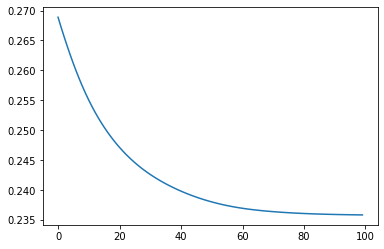

In [5]:
plt.plot(losses);

# Activity 2 on pg 50 in Chapter 2: Data Preparation

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# get data
data = pd.read_csv('YearPredictionMSD.txt', header=None, nrows=50000)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [8]:
# check if some columns have non-numeric data
cols = data.iloc[0,:]
print(cols)
print('\ndtype: ' + str(cols.dtype))

0     2001.00000
1       49.94357
2       21.47114
3       73.07750
4        8.74861
         ...    
86     -23.08793
87      68.40795
88      -1.82223
89     -27.46348
90       2.26327
Name: 0, Length: 91, dtype: float64

dtype: float64


In [9]:
# check if numeric
numeric_column = data.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())
nonnumeric_columns = numeric_column.index[numeric_column == False].tolist()
if not nonnumeric_columns:
    print('All Numeric Data')
else:
    print(f'Columns with non-numeric values are: {nonnumeric_columns}')

All Numeric Data


In [10]:
# check if any missing values
num_missing = data.isnull().sum().sum()
if num_missing == 0:
    print('No missing values')
else:
    print(f'There are {num_missing} missing values.')

No missing values


In [11]:
outliers = {}
for i in range(data.shape[1]):
    min_t = data[data.columns[i]].mean() -  3 * data[data.columns[i]].std()
    max_t = data[data.columns[i]].mean() +  3 * data[data.columns[i]].std()
    count = 0
    for j in data[data.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    percentage = count/data.shape[0] * 100
    outliers[data.columns[i]] = f'{percentage:.2}%'
print(outliers)

{0: '1.9%', 1: '0.96%', 2: '1.1%', 3: '1.1%', 4: '1.5%', 5: '0.8%', 6: '1.0%', 7: '0.98%', 8: '1.0%', 9: '1.1%', 10: '0.55%', 11: '1.0%', 12: '0.97%', 13: '1.5%', 14: '1.7%', 15: '1.6%', 16: '1.6%', 17: '1.4%', 18: '1.6%', 19: '1.3%', 20: '1.6%', 21: '1.5%', 22: '1.3%', 23: '1.5%', 24: '1.3%', 25: '1.8%', 26: '1.7%', 27: '1.7%', 28: '1.8%', 29: '1.7%', 30: '1.6%', 31: '1.5%', 32: '1.7%', 33: '1.6%', 34: '1.5%', 35: '1.6%', 36: '1.7%', 37: '1.7%', 38: '1.6%', 39: '1.5%', 40: '1.7%', 41: '1.7%', 42: '1.5%', 43: '1.4%', 44: '1.6%', 45: '1.5%', 46: '1.7%', 47: '1.7%', 48: '1.7%', 49: '1.5%', 50: '1.6%', 51: '1.5%', 52: '1.5%', 53: '1.5%', 54: '1.6%', 55: '1.8%', 56: '1.7%', 57: '1.6%', 58: '1.3%', 59: '1.6%', 60: '1.6%', 61: '1.5%', 62: '1.6%', 63: '1.7%', 64: '1.7%', 65: '1.6%', 66: '1.8%', 67: '1.5%', 68: '1.8%', 69: '1.6%', 70: '1.7%', 71: '1.6%', 72: '1.8%', 73: '1.5%', 74: '1.6%', 75: '1.5%', 76: '1.7%', 77: '1.8%', 78: '1.5%', 79: '1.4%', 80: '1.5%', 81: '1.8%', 82: '1.7%', 83: '1.5%

In [12]:
# split features and labels
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [13]:
# standardization
X = (X - X.mean()) / X.std()
X.head()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
0,1.082657,0.382437,1.841985,0.459652,-0.480074,-0.282606,-1.590785,-1.300854,0.378336,-0.683719,...,-0.086005,0.099339,0.148291,-0.255625,0.040944,-0.362616,0.524542,-0.467668,-0.247579,0.036872
1,0.880874,0.321953,1.763666,0.717085,-0.165507,-1.188896,0.777905,0.122576,1.420531,0.401198,...,-0.316635,0.301448,-0.063611,0.031855,-0.655124,-0.443921,0.536517,0.573191,0.209887,1.155171
2,1.251484,0.588929,1.350579,0.745944,0.000857,-0.703401,-0.066747,-0.057380,1.163637,-0.090081,...,-0.399185,0.567666,-0.749508,-0.301984,-0.034072,0.227059,-0.528413,-0.335333,0.109957,-0.095865
3,0.800148,-0.082240,0.794774,0.081829,0.336246,-1.295366,0.517369,-1.062869,-0.029679,-1.282306,...,0.590596,-0.583396,-0.472129,-0.904164,-0.820141,0.577357,-0.282033,0.412329,0.961849,0.789313
4,1.253660,0.794806,1.671781,0.442438,-0.411071,-0.569426,-0.712128,-0.941459,0.836414,-0.160630,...,-0.182976,0.090307,0.196753,-0.601570,-0.123595,-0.223957,0.429005,0.260874,0.195160,1.238096


In [14]:
from sklearn.model_selection import train_test_split
X_shuffle = X.sample(frac=1)
Y_shuffle = Y.sample(frac=1)

x_new, x_test, y_new, y_test = train_test_split(X_shuffle, Y_shuffle, test_size=0.2, random_state=0)

dev_per = x_test.shape[0]/x_new.shape[0]
x_train, x_dev, y_train, y_dev = train_test_split(x_new, y_new, test_size=dev_per, random_state=0)
print(x_train.shape, y_train.shape)
print(x_dev.shape, y_dev.shape)
print(x_test.shape, y_test.shape)

(30000, 90) (30000,)
(10000, 90) (10000,)
(10000, 90) (10000,)


# Activity 1 on pg 55 in Chapter 2: Developing a Deep Learning Solution for a Regression Probelm

In [15]:
import torch
import torch.nn

In [16]:
x_train.values

array([[-0.32373719,  0.63176868, -1.45583473, ...,  0.10887368,
        -0.24438447, -0.31329934],
       [-0.22693673, -0.38199697,  0.38908947, ...,  0.53574038,
        -0.05753375, -0.16755153],
       [ 1.04128669,  0.56398328,  0.22456761, ...,  0.3073368 ,
        -0.33685219, -0.15780187],
       ...,
       [ 1.26556426,  0.02321362,  0.6635287 , ..., -0.28701707,
        -0.31211232, -0.12916517],
       [ 0.58135667,  0.16818016,  1.5199075 , ..., -0.49193995,
        -0.22329504,  0.24563455],
       [-1.13809697, -1.44801413, -0.48667765, ..., -0.52175587,
         0.24002076, -0.89662665]])

In [17]:
# make tensors
x_train = torch.Tensor(x_train.values)
y_train = torch.Tensor(y_train.values)

x_dev = torch.Tensor(x_dev.values)
y_dev = torch.Tensor(y_dev.values)

x_test = torch.Tensor(x_test.values)
y_test = torch.Tensor(y_test.values)

In [24]:
x_train.shape[1]

90

In [31]:
# create model
input_size = x_train.shape[1]
h0_size = 60
h1_size = 30
h2_size = 15
output_size = 1
# 4 layers
model = nn.Sequential(nn.Linear(input_size,h0_size),
                    nn.ReLU(),
                    
                    nn.Linear(h0_size, h1_size),
                    nn.ReLU(),
                    
                    nn.Linear(h1_size, h2_size),
                    nn.ReLU(),
                    
                    nn.Linear(h2_size, output_size))

loss_func = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
# train
losses = []
for i in range(100):
    y_pred = model(x_train)
    loss = loss_func(y_pred, y_train)
    losses.append(loss.item())
    print(f'{i}: {loss.item()}')
    optim.zero_grad()
    loss.backward()
    optim.step()

0: 520143.4375
1: 493169.96875
2: 473774.1875
3: 461882.5
4: 455548.40625
5: 451492.96875
6: 446252.3125
7: 437401.9375
8: 424329.78125
9: 408190.875
10: 391094.0
11: 375203.34375
12: 362025.59375
13: 352049.40625
14: 344846.4375
15: 339477.875
16: 334840.59375
17: 330036.78125
18: 324568.34375
19: 318342.9375
20: 311625.90625
21: 304883.59375
22: 298598.53125
23: 293092.5625
24: 288444.3125
25: 284481.375
26: 280868.46875
27: 277224.71875
28: 273290.625
29: 268999.875
30: 264467.78125
31: 259924.328125
32: 255612.390625
33: 251685.875
34: 248179.90625
35: 245013.765625
36: 242042.515625
37: 239115.1875
38: 236120.140625
39: 233014.984375
40: 229830.15625
41: 226640.828125
42: 223530.015625
43: 220570.765625
44: 217783.1875
45: 215147.921875
46: 212616.546875
47: 210126.515625
48: 207628.46875
49: 205105.96875
50: 202571.625
51: 200060.265625
52: 197608.375
53: 195239.6875
54: 192960.890625
55: 190758.65625
56: 188613.09375
57: 186504.015625
58: 184422.5625
59: 182361.96875
60: 180329.

In [35]:
# performance
pred = model(x_test[0])
print(y_test[0], pred)

tensor(2001.) tensor([2106.0288], grad_fn=<AddBackward0>)


# BCELoss On XOR Problem

In [36]:
import torch
import torch.nn as nn
import numpy as np

In [37]:
# model
input_units = 2
hidden_units = 20
output_units = 1

model = nn.Sequential(nn.Linear(input_units, hidden_units),
    nn.ReLU(),
    nn.Linear(hidden_units, output_units),
    nn.Sigmoid())
loss_function = torch.nn.BCELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [38]:
# data
x = [[0.,0.], [0.,1.], [1.,0.],[1.,1.]]
x = torch.tensor(x)
y =[[0], [1], [1], [0]]
y = torch.tensor(y)

In [39]:
# train
for i in range(100):
    # Call to to the model to perform a prediction
    y_pred = model(x)
    # Calculation of loss function based on y_pred and y
    y = y.type_as(y_pred)
    loss = loss_function(y_pred, y)
    # Zero the gradients so that previous ones don't accumulate
    optimizer.zero_grad()
    # Calculate the gradients of the loss function
    loss.backward()
    # Call to the optimizer to perform an update of the parameters
    optimizer.step()
    # print('loss ', loss)

In [40]:
# results
print('true y')
print(y.detach().numpy())
print()
print('y_pred')
print(y_pred.detach().numpy())   

true y
[[0.]
 [1.]
 [1.]
 [0.]]

y_pred
[[0.13556355]
 [0.8504423 ]
 [0.84838325]
 [0.15160818]]
